## Reuters News 다중 분류 - LSTM
- 데이터 탐색

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [2]:
(X_train, y_train), (X_test, y_test) = reuters.load_data()
len(X_train), len(X_test)

2110848/2110848 [==============================] - 0s 0us/step


(8982, 2246)

In [3]:
# 카테고리 갯수
max(y_train) + 1

46

In [4]:
# 첫번째 뉴스
print(X_train[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
type(reuters.get_word_index())

550378/550378 [==============================] - 0s 0us/step


dict

In [6]:
reuters.get_word_index()['the']

1

In [7]:
index_word = {}
for key, value in reuters.get_word_index().items():
    index_word[value] = key
len(index_word)

30979

In [8]:
# 첫번째 기사 복원
' '.join(index_word[index] for index in X_train[0])

'the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [9]:
# 뉴스 기사의 최대/평균 길이
max(len(s) for s in X_train), sum(map(len, X_train)) / len(X_train)

(2376, 145.5398574927633)

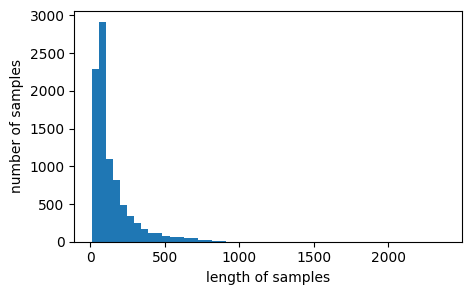

In [10]:
# 뉴스 기사 단어수의 분포
plt.figure(figsize=(5,3))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples'), plt.ylabel('number of samples')
plt.show()

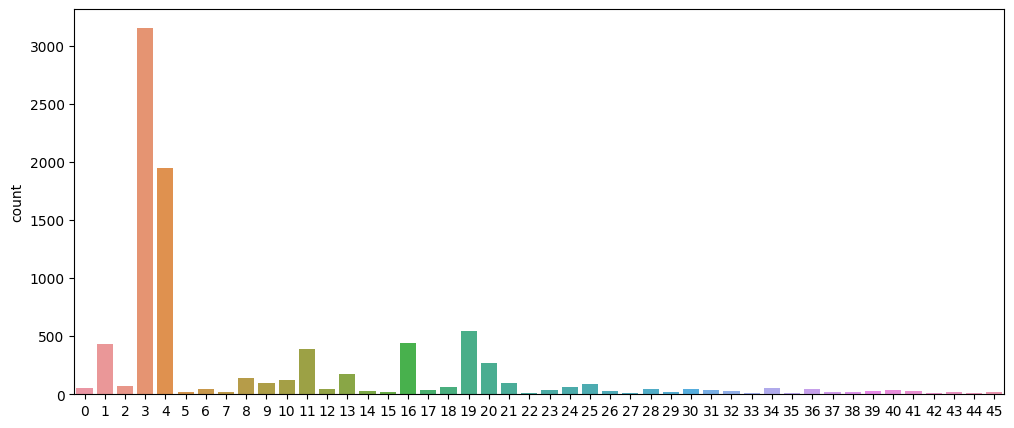

In [11]:
# 뉴스 그룹의 분포
plt.figure(figsize=(12,5))
sns.countplot(x=y_train);

#### LSTM으로 뉴스 분류
- 문장 길이: 120 단어(최대: 2,376, 평균: 146)
- 단어: 빈도수 기준 3,000 단어(총 단어수: 30,979)

In [12]:
max_words = 3000
max_len = 120

In [13]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=max_words, test_split=0.2
)
len(X_train), len(X_test)

(8982, 2246)

In [14]:
import tensorflow as tf
seed = 2023
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8982, 120), (2246, 120), (8982, 46), (2246, 46))

- 모델
    - Embedding vector length: 64
    - LSTM unit 갯수: 100

In [17]:
model = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(100),
    Dense(46, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 64)           192000    
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 46)                4646      
                                                                 
Total params: 262646 (1.00 MB)
Trainable params: 262646 (1.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

model_path = 'best-reuters-lstm.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [19]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, verbose=0,
    epochs=100, batch_size=128, callbacks=[mc,es]
)


Epoch 1: val_loss improved from inf to 2.42018, saving model to best-reuters-lstm.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.42018 to 2.21435, saving model to best-reuters-lstm.h5

Epoch 3: val_loss improved from 2.21435 to 2.04040, saving model to best-reuters-lstm.h5

Epoch 4: val_loss improved from 2.04040 to 1.83473, saving model to best-reuters-lstm.h5

Epoch 5: val_loss improved from 1.83473 to 1.74158, saving model to best-reuters-lstm.h5

Epoch 6: val_loss improved from 1.74158 to 1.72857, saving model to best-reuters-lstm.h5

Epoch 7: val_loss improved from 1.72857 to 1.67666, saving model to best-reuters-lstm.h5

Epoch 8: val_loss did not improve from 1.67666

Epoch 9: val_loss did not improve from 1.67666

Epoch 10: val_loss improved from 1.67666 to 1.62141, saving model to best-reuters-lstm.h5

Epoch 11: val_loss improved from 1.62141 to 1.56367, saving model to best-reuters-lstm.h5

Epoch 12: val_loss improved from 1.56367 to 1.53804, saving model to best-reuters-lstm.h5

Epoch 13: val_loss improved from 1.53804 to 1.53182, saving model to best-reuters-lstm.h5


In [20]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 7ms/step - loss: 1.4273 - accuracy: 0.6456


[1.4273074865341187, 0.6455921530723572]

#### LSTM으로 뉴스 분류 Ver.2
- 문장 길이: 100 단어(최대: 2,376, 평균: 146)
- 단어: 빈도수 기준 1,000 단어(총 단어수: 30,979)

In [21]:
max_words = 1000
max_len = 100
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=max_words, test_split=0.2
)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8982, 100), (2246, 100), (8982, 46), (2246, 46))

In [22]:
model2 = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(100),
    Dense(46, activation='softmax')
])

model2.compile('adam', 'categorical_crossentropy', ['accuracy'])

model_path = 'best-reuters-lstm-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

hist2 = model2.fit(
    X_train, Y_train, validation_split=0.2, verbose=0,
    epochs=100, batch_size=128, callbacks=[mc,es]
)


Epoch 1: val_loss improved from inf to 2.41680, saving model to best-reuters-lstm-v2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.41680 to 2.40307, saving model to best-reuters-lstm-v2.h5

Epoch 3: val_loss improved from 2.40307 to 2.05425, saving model to best-reuters-lstm-v2.h5

Epoch 4: val_loss improved from 2.05425 to 1.99937, saving model to best-reuters-lstm-v2.h5

Epoch 5: val_loss improved from 1.99937 to 1.90561, saving model to best-reuters-lstm-v2.h5

Epoch 6: val_loss improved from 1.90561 to 1.89349, saving model to best-reuters-lstm-v2.h5

Epoch 7: val_loss improved from 1.89349 to 1.71721, saving model to best-reuters-lstm-v2.h5

Epoch 8: val_loss improved from 1.71721 to 1.66184, saving model to best-reuters-lstm-v2.h5

Epoch 9: val_loss improved from 1.66184 to 1.57318, saving model to best-reuters-lstm-v2.h5

Epoch 10: val_loss improved from 1.57318 to 1.52997, saving model to best-reuters-lstm-v2.h5

Epoch 11: val_loss did not improve from 1.52997

Epoch 12: val_loss improved from 1.52997 to 1.47766, saving model to best-reuters-lstm-v2.h5

Epoch 13: val_loss

In [23]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 1s 5ms/step - loss: 1.3513 - accuracy: 0.6683


[1.351276159286499, 0.6682991981506348]

#### LSTM으로 뉴스 분류 Ver.3
- 문장 길이: 150 단어(최대: 2,376, 평균: 146)
- 단어: 빈도수 기준 5,000 단어(총 단어수: 30,979)

In [24]:
max_words = 5000
max_len = 150
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=max_words, test_split=0.2
)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8982, 150), (2246, 150), (8982, 46), (2246, 46))

In [25]:
model3 = Sequential([
    Embedding(max_words, 64, input_length=max_len),
    LSTM(100),
    Dense(46, activation='softmax')
])

model3.compile('adam', 'categorical_crossentropy', ['accuracy'])

model_path = 'best-reuters-lstm-v3.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

hist3 = model3.fit(
    X_train, Y_train, validation_split=0.2, verbose=0,
    epochs=100, batch_size=128, callbacks=[mc,es]
)


Epoch 1: val_loss improved from inf to 2.41380, saving model to best-reuters-lstm-v3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2.41380 to 2.13573, saving model to best-reuters-lstm-v3.h5

Epoch 3: val_loss improved from 2.13573 to 2.01741, saving model to best-reuters-lstm-v3.h5

Epoch 4: val_loss improved from 2.01741 to 1.85722, saving model to best-reuters-lstm-v3.h5

Epoch 5: val_loss improved from 1.85722 to 1.70445, saving model to best-reuters-lstm-v3.h5

Epoch 6: val_loss improved from 1.70445 to 1.61458, saving model to best-reuters-lstm-v3.h5

Epoch 7: val_loss improved from 1.61458 to 1.60505, saving model to best-reuters-lstm-v3.h5

Epoch 8: val_loss improved from 1.60505 to 1.49063, saving model to best-reuters-lstm-v3.h5

Epoch 9: val_loss did not improve from 1.49063

Epoch 10: val_loss improved from 1.49063 to 1.39506, saving model to best-reuters-lstm-v3.h5

Epoch 11: val_loss did not improve from 1.39506

Epoch 12: val_loss improved from 1.39506 to 1.35808, saving model to best-reuters-lstm-v3.h5

Epoch 13: val_loss did not improve from 1.35808

Epoch 14: val_

In [26]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

71/71 [==============================] - 2s 9ms/step - loss: 1.4432 - accuracy: 0.6465


[1.4432430267333984, 0.6464826464653015]

- 결과 비교

In [27]:
import pandas as pd
num_words = [100, 120, 150]
words_per_article = [1000, 3000, 5000]
num_embed = [64, 64, 64]
num_units = [100, 100, 100]
acc = [0.6683, 0.6456, 0.6465]
df = pd.DataFrame({
    '고유단어수':num_words, '기사당 단어수':words_per_article, '임베딩 벡터':num_embed,
    'LSTM 유닛':num_units, '정확도':acc
})
df

,고유단어수,기사당 단어수,임베딩 벡터,LSTM 유닛,정확도
0,100,1000,64,100,0.6683
1,120,3000,64,100,0.6456
2,150,5000,64,100,0.6465
